In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
all_matches = pd.read_csv("dota_matches.csv")
print(all_matches.info())
print(all_matches.head())
ranked_all_pick_matches = all_matches[all_matches['game_mode'] == 22]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299800 entries, 0 to 299799
Data columns (total 14 columns):
avg_mmr          241056 non-null float64
avg_rank_tier    299800 non-null int64
cluster          299800 non-null int64
dire_team        299800 non-null object
duration         299800 non-null int64
game_mode        299800 non-null int64
lobby_type       299800 non-null int64
match_id         299800 non-null int64
match_seq_num    299800 non-null int64
num_mmr          241056 non-null float64
num_rank_tier    299800 non-null int64
radiant_team     299800 non-null object
radiant_win      299800 non-null bool
start_time       299800 non-null int64
dtypes: bool(1), float64(2), int64(9), object(2)
memory usage: 30.0+ MB
None
   avg_mmr  avg_rank_tier  cluster         dire_team  duration  game_mode  \
0      NaN             33      156   17,18,14,64,102      1427         22   
1   3766.0             61      227    106,22,14,1,45      2506         22   
2   2267.0             49     

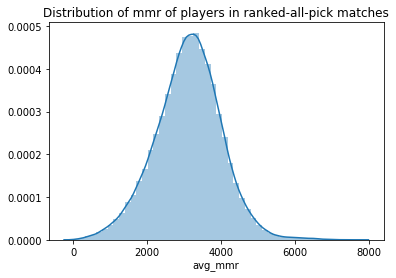

number of matches in distribution: 132181


In [28]:
ranked_known_mmr_filter = (all_matches['num_mmr'] > 1) & (all_matches['game_mode'] == 22)
sns.distplot(all_matches.loc[ranked_known_mmr_filter,'avg_mmr']).set_title(
    "Distribution of mmr of players in ranked-all-pick matches"
)
plt.show()
print("number of matches in distribution: " + str(len(all_matches.loc[ranked_known_mmr_filter,'avg_mmr'])))

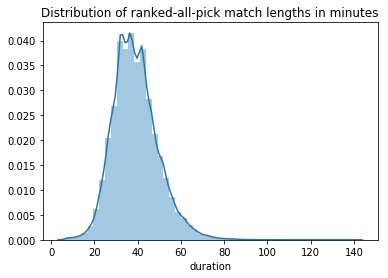

number of matches in distribution: 132181


In [24]:
sns.distplot(all_matches.loc[ranked_known_mmr_filter,'duration']/60).set_title(
    "Distribution of ranked-all-pick match lengths in minutes"
)
plt.show()
print("number of matches in distribution: " + str(len(all_matches.loc[ranked_known_mmr_filter,'duration'])))

In [26]:
radiant_win_percentage = round(100*len(all_matches[all_matches['radiant_win']])/len(all_matches),1)
print("The Radiant side has a win rate of: " + str(radiant_win_percentage) +"%")

The Radiant side has a win rate of: 54.6%


These distributions show that our data set seems to be representative of the overall playerbase when compared with the distributions of the whole population at https://www.opendota.com/distributions as expected since the data is taken from the same source. We can now go ahead and use this data to train the hero embedding model under the assumption that there are no obvious biases. However, given that radiant has a win rate of 54.6%, our win predicting model will need to beat this percentage, otherwise just guessing radiant every time will give better results.